In [16]:
# imports
%reset -f
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import metrics, preprocessing, linear_model, naive_bayes, tree, neighbors
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import log_loss, roc_auc_score, classification_report, confusion_matrix, cohen_kappa_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, log_loss, roc_auc_score, roc_curve, auc
from sklearn.cross_validation import StratifiedKFold, ShuffleSplit, cross_val_score, train_test_split
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
# #http://rcarneva.github.io/understanding-gradient-boosting-part-1.html
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesRegressor, ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA, RandomizedPCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import make_union, make_pipeline
from sklearn.cross_validation import StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, Ridge, SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import BernoulliRBM
from sklearn.preprocessing import PolynomialFeatures, Imputer
from sklearn.pipeline import Pipeline

import math
import warnings
from functools import wraps

import pandas as pd
import psutil
import scipy.io
import scipy.io.wavfile
import sklearn.linear_model as slm
import xgboost as xgb
from bayes_opt import BayesianOptimization
from sklearn import ensemble
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.preprocessing import Normalizer
# from tsne import bh_sne
from xgboost import XGBClassifier
from sklearn.calibration import CalibratedClassifierCV

warnings.filterwarnings('ignore')

# numerical processing and scientific libraries
import scipy

import os,sys

from sklearn.metrics import log_loss, roc_auc_score, roc_curve
from sklearn.cross_validation import StratifiedKFold, cross_val_score, train_test_split
import pandas
from scipy.stats import norm
import scipy.sparse
# from bhtsne import tsne
import spectrum

from sklearn.neural_network import BernoulliRBM
from sklearn.preprocessing import PolynomialFeatures, Imputer

# Set seed for reproducibility
np.random.seed(0)
from ipywidgets import widgets

%matplotlib inline

In [46]:
from ipywidgets import Layout, Button, Box, FloatText, Textarea, Dropdown, Label, IntSlider

form_item_layout = Layout(
    display='flex',
    flex_flow='row',
    justify_content='space-between'
)

cb_boosting=widgets.Checkbox(
    value=False,
    description='Boosting',
    disabled=False
)

cb_bagging=widgets.Checkbox(
    value=False,
    description='Bagging',
    disabled=False
)

cb_stacking=widgets.Checkbox(
    value=False,
    description='Stacking',
    disabled=False
)

algo=widgets.SelectMultiple(
    options=['Logistic', 'XGboost', 'SGD'],
    value=['Logistic'],
    #rows=10,
    description='Algorithms',
    disabled=False
)

opt=widgets.Select(
    options=['GridSearchCV', 'RandomSearchCV', 'BayesianOpt', 'CalibratedClassifierCV'],
    value='GridSearchCV',
    # rows=10,
    description='Optimization:',
    disabled=False
)

cb_poly=widgets.Checkbox(
    value=False,
    description='Polynomial',
    disabled=False
)

cb_pca=widgets.Checkbox(
    value=False,
    description='PCA',
    disabled=False
)

cb_scaler=widgets.Checkbox(
    value=False,
    description='MinMaxScaler',
    disabled=False
)

run=widgets.ToggleButton(
    value=False,
    description='Execute Models',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description',
    
)


form_items = [
#     Box([Label(value='Business Problem'), IntSlider(min=40, max=60)], layout=form_item_layout),
    Box([Label(value='PlayBook & Solutions library:'), Dropdown(options=['Customer CHURN', 'Customer Purchase'])], layout=form_item_layout),
    Box([Label(value='Data Set:'), Dropdown(options=['CTR Google', 'CTR Yahoo'])], layout=form_item_layout),
    Box([Label(value='Algorithms:'), algo ], layout=form_item_layout),        
    Box([Label(value='Optimization:'), opt ], layout=form_item_layout),        
    Box([Label(value='Features:'), cb_poly, cb_pca,cb_scaler ], layout=form_item_layout),        
    Box([Label(value='Ensambling:'), cb_boosting, cb_bagging,cb_stacking ], layout=form_item_layout), 
    run
]

form = Box(form_items, layout=Layout(
    display='flex',
    flex_flow='column',
    border='solid 2px',
    align_items='stretch',
    width='100%'
))
form

In [21]:
widgets.ToggleButton(
    value=False,
    description='Click me',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description',
    icon='check'
)

In [22]:
widgets.Dropdown(
    options=['1', '2', '3'],
    value='2',
    description='Number:',
    disabled=False,
    button_style='' # 'success', 'info', 'warning', 'danger' or ''
)

In [23]:
widgets.Select(
    options=['Linux', 'Windows', 'OSX'],
    value='OSX',
    # rows=10,
    description='OS:',
    disabled=False
)

In [24]:
widgets.SelectionSlider(
    options=['scrambled', 'sunny side up', 'poached', 'over easy'],
    value='sunny side up',
    description='I like my eggs ...',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
#     readout_format='i',
#     slider_color='black'
)

In [25]:
widgets.ToggleButtons(
    options=['Slow', 'Regular', 'Fast'],
    description='Speed:',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description',
#     icon='check' 
)

In [26]:
widgets.SelectMultiple(
    options=['Apples', 'Oranges', 'Pears'],
    value=['Oranges'],
    #rows=10,
    description='Fruits',
    disabled=False
)

In [29]:
list = ['P0', 'P1', 'P2', 'P3', 'P4']
children = [widgets.Text(description=name) for name in list]


tab = widgets.Tab(children=children)
tab

In [ ]:
https://github.com/jupyter-widgets/ipywidgets/blob/883ff53a7cd7c9546b0ba0c79d6b8128a6423d15/docs/source/examples/Widget%20List.ipynb

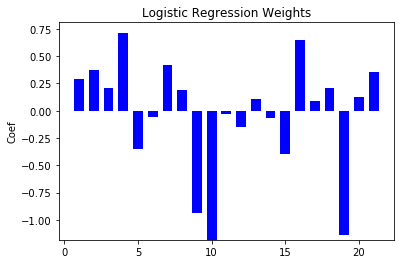

In [71]:
# The logistic Regression model uses almost all the features in a siginicant way.

y = list(np.transpose(model_lr_l2.coef_))
plt.bar(range(1,22), y, width=1/1.5, color="blue")
plt.ylabel('Coef')
plt.title('Logistic Regression Weights')
plt.show()